In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import START,END, StateGraph
from langchain_core.messages import BaseMessage, HumanMessage
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Initialize the Google Generative AI model
model = ChatGoogleGenerativeAI(model= "gemini-2.0-flash-lite")

# Define the state graph for the chatbot
class ChatbotState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]
    
def chatbot_result(state: ChatbotState) -> str:
    
    result = model.invoke(state['messages'])
    return {"messages": [result]}

# Create the state graph
graph = StateGraph(ChatbotState)
checkpointer = InMemorySaver()

graph.add_node("chatbot", chatbot_result)

# Start the conversation    
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

# Execute the conversation
chatbot = graph.compile(checkpointer= checkpointer)


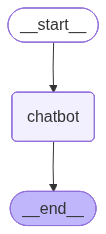

In [2]:
chatbot

In [ ]:
thread_id = 2
CONFIG = {'configurable': {'thread_id': thread_id}}
# Start the conversation
response = chatbot.invoke({"messages": "what are the differences between a sail boat and a steam boat?"}, config= CONFIG)
# print("Bot:", response['messages'][-1].content)


